# Stock Price Prediction using Machine Learning 

Let’s start by importing some libraries which will be used for various purposes which will be explained later in this article.

## Importing Libraries
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

- Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
- Matplotlib/Seaborn – This library is used to draw visualizations.
- Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
- XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from utils import model_description, display_results
import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset
The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 29st June 2010 to 3rd February 2020 which is for 10 years for the Tesla stocks.

In [7]:
df = pd.read_csv('./dataset/tesla_stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [8]:
df.shape

(2416, 7)

From this, we got to know that there are 2416 rows of data available and for each row, we have 7 different features or columns.

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


## Exploratory Data Analysis
$EDA$ is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

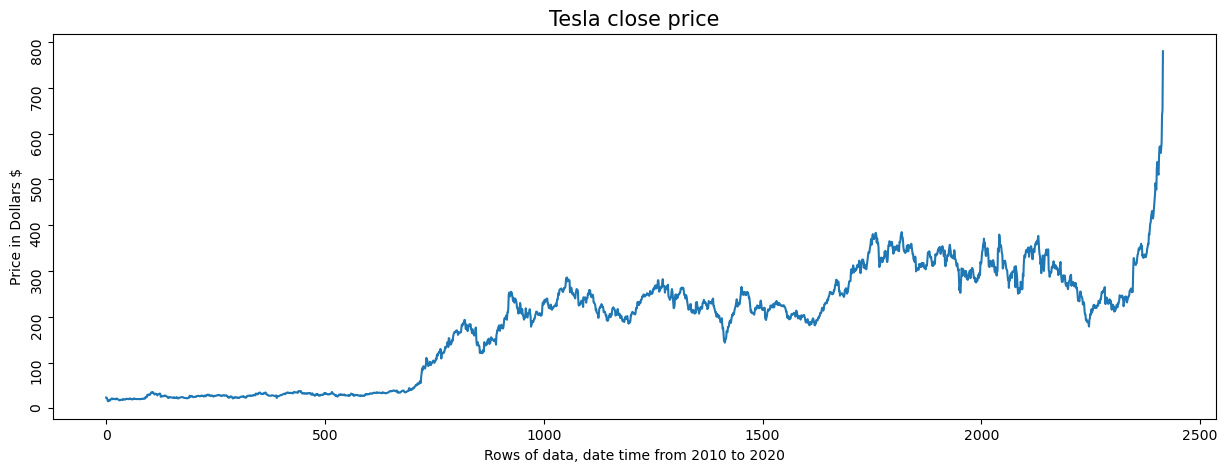

In [11]:
plt.figure(figsize= (15, 5))
plt.plot(df['Close'])
plt.title('Tesla close price', fontsize= 15)
plt.ylabel('Price in Dollars $')
plt.xlabel('Rows of data, date time from 2010 to 2020')
plt.yticks(rotation= 90)
plt.legend
plt.show()

If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [12]:
print(df['Adj Close'].equals(df['Close']))

True


From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [13]:
df = df.drop('Adj Close', axis = 1)

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


Now let’s draw the distribution plot for the continuous features given in the dataset.

Before moving further let’s check for the null values if any are present in the data frame.

In [15]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

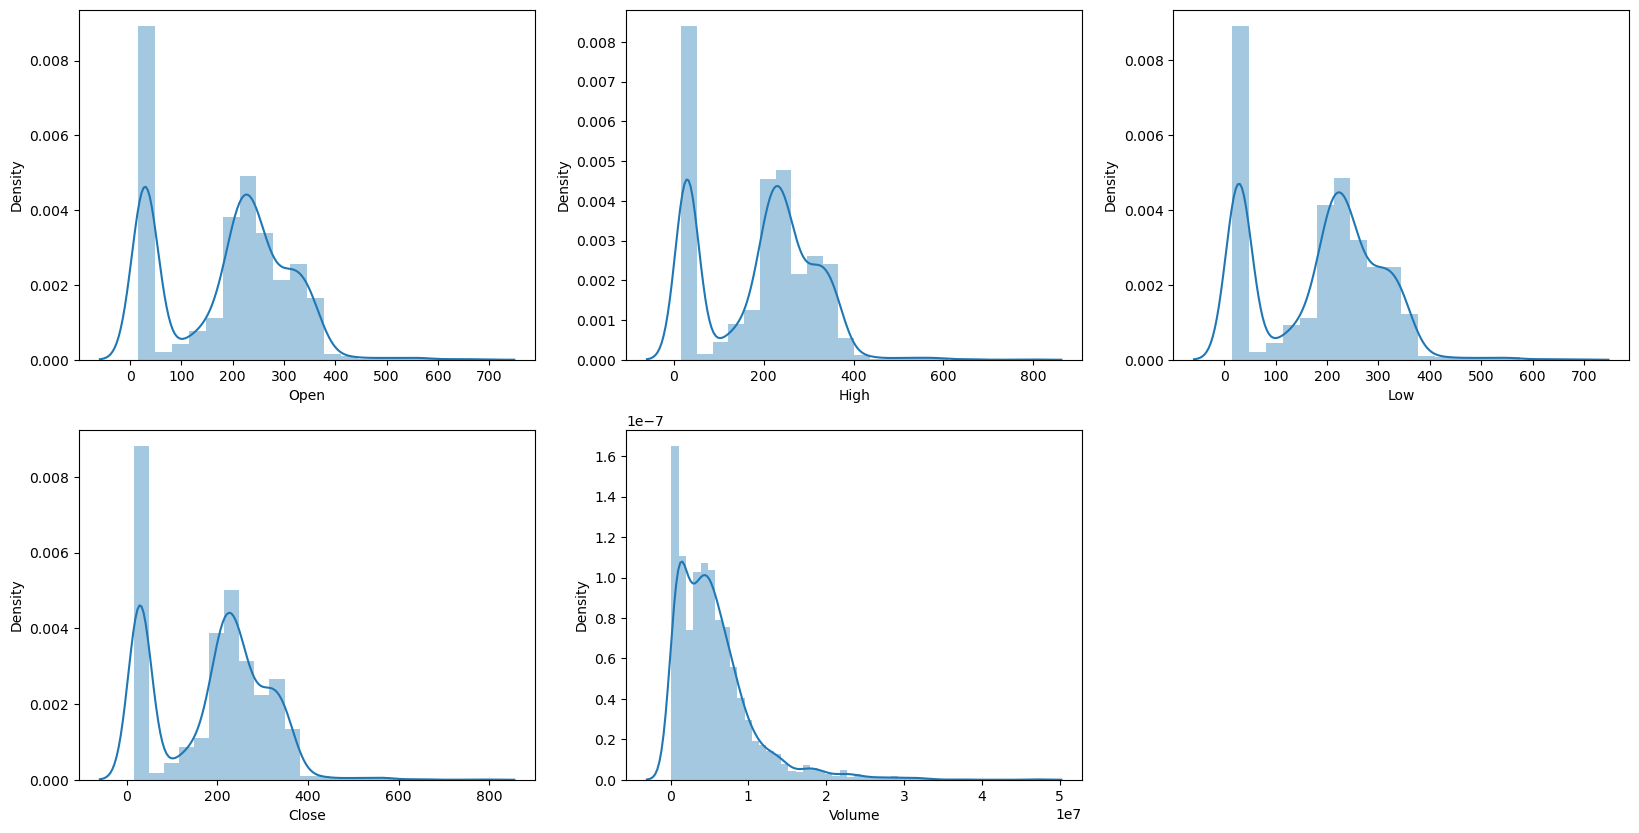

In [16]:
plt.subplots(figsize= (20, 10))
for i, col in enumerate(df.drop(columns= ['Date'])):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[col])
    
plt.show()

In the distribution plot of OHLC data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is **left-skewed**.

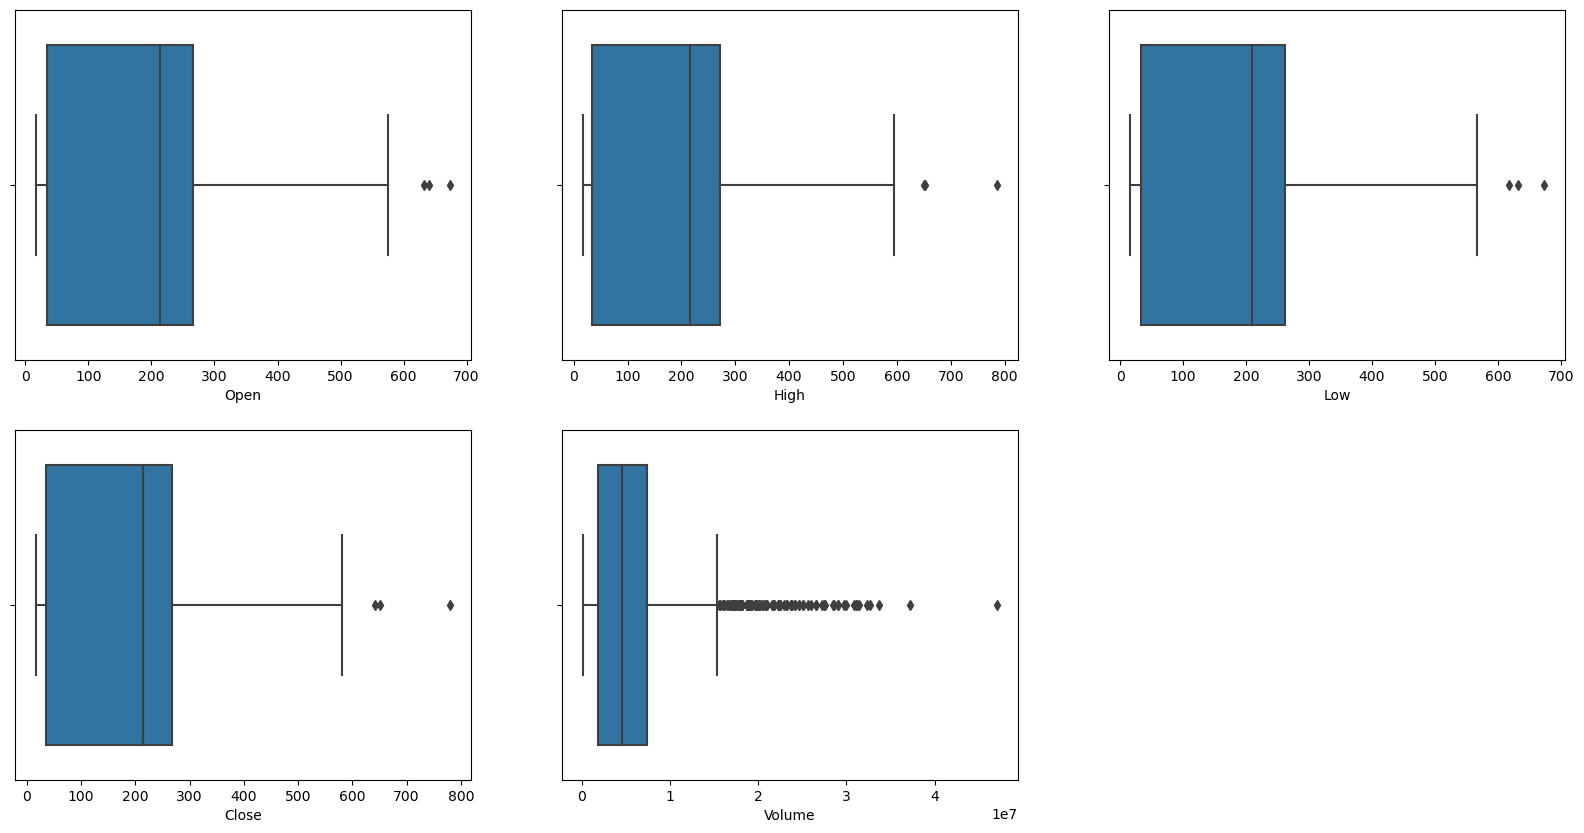

In [17]:
plt.subplots(figsize= (20, 10))
for i, col in enumerate(df.drop(columns= ['Date'])):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[col])
    
plt.show()

From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

## Feature Engineering

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

In [18]:
splitted= df['Date'].str.split('-', expand= True)
df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [20]:
df['is_quarter_end'] = np.where((df['month'] % 3== 0),1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,2010,7,6,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

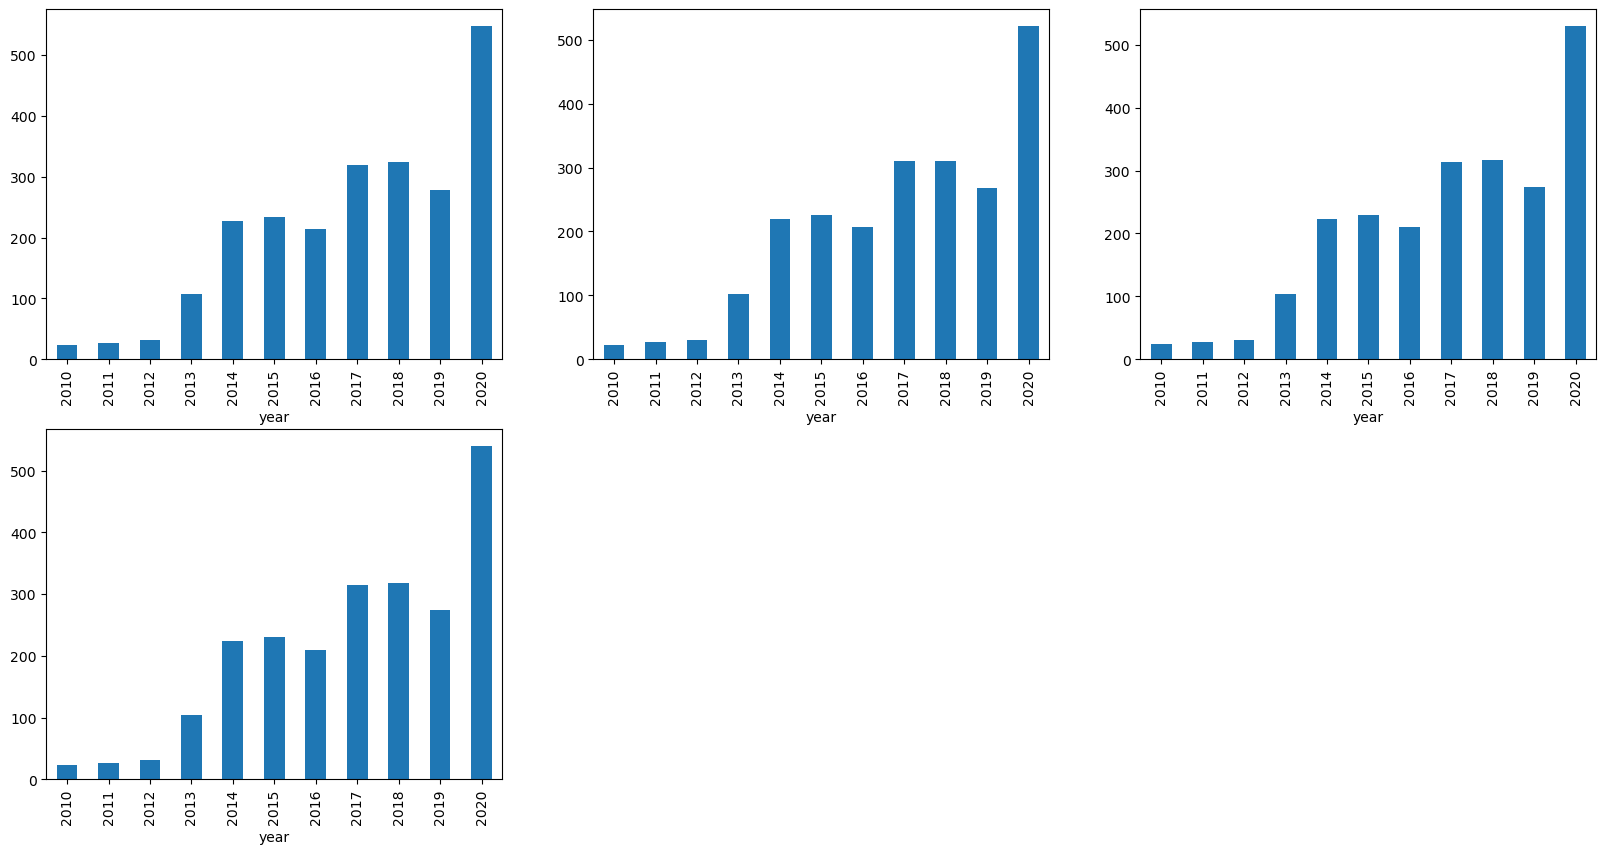

In [21]:
data_grouped = df.drop('Date', axis= 1).groupby('year').mean()
plt.subplots(figsize= (20, 10))
for i, col in enumerate(['High', 'Low', 'Open', 'Close']):
    plt.subplot(2, 3, i+1)
    data_grouped[col].plot.bar()
    
plt.show()

From the above bar graph, we can conclude that the stock prices have doubled from the year **2013** to that in **2014** and **2020**.

In [22]:
df.drop(columns= ['Date', 'year', 'month', 'day'], axis= 1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume
is_quarter_end,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06


Here are some of the important observations of the above-grouped data:

- Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
- The volume of trades is lower in the months which are quarter end.

In [23]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where((df['Close'].shift(-1) > df['Close']), 1, 0)

Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a _pie chart_.

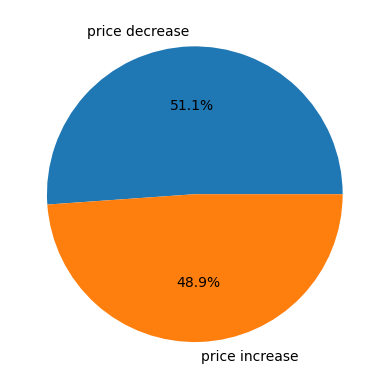

In [24]:
plt.pie(
    df['target'].value_counts().values,
    labels= ['price decrease', 'price increase'],
    autopct= '%1.1f%%'

)
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

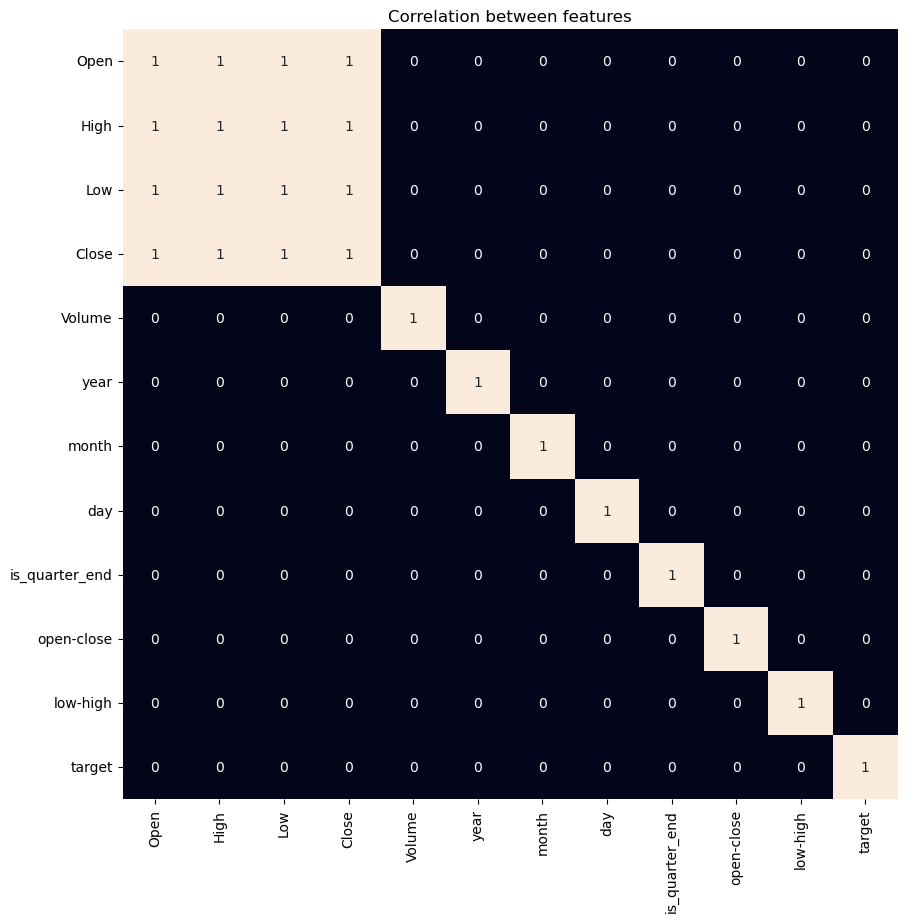

In [25]:
plt.figure(figsize= (10, 10))

# As our concern is with the highly 
# correlated features only so, we will visualize 
# our heatmap as per that criteria only. 
sns.heatmap(
    df.drop('Date', axis= 1).corr() > 0.9,
    annot= True,
    cbar= False
)
plt.title('Correlation between features')
plt.show()

From the above $heatmap$ , we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

## Data Splitting and Normalization

In [26]:
x = df[['open-close', 'low-high', 'is_quarter_end', 'Volume']]
y = df['target']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                    random_state= 1,
                                                    test_size= 0.2,
)
print(x_train.shape, x_test.shape)

(1932, 4) (484, 4)


After selecting the features to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 80/20 ratio so, that we can evaluate the performance of our model on unseen data.

In [27]:
models= [
    SVC(kernel= 'poly', probability= True ,random_state= 1),
    DecisionTreeClassifier(random_state= 1),
    LogisticRegression(random_state= 1),
    XGBClassifier(random_state= 1),
    XGBRFClassifier(random_state= 1),
    RandomForestClassifier(random_state= 1)
]

Now is the time to train some state-of-the-art machine learning models($Logistic Regression$, $Support Vector Machine$, $XGBClassifier$, $XGBRClassifier$ , $Random Forrest$, $Decision Tree$), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the *ROC-AUC* and *Accuracy Score* curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.
Before it I wrote some functions in utils file where can minimize our code.I call some of these in here.
for more information please check utils file and watch functions to understand these.

In [63]:
for model in models:
    model_description(model, x_train, y_train, x_test, y_test)


=== Model Performance Summary ===

📌 Model: SVC
Train Accuracy: 0.5171
Roc-Auc Curve Train Accuracy: 0.5087
Train F1 Score (Class 1): 0.6748
Train F1 Score (Class 0): 0.0623
Test Accuracy: 0.5103
Roc-Auc Curve Test Accuracy: 0.4904
Test F1 Score (Class 1): 0.6740
Test F1 Score (Class 0): 0.0166

📌 Model: DecisionTreeClassifier
Train Accuracy: 1.0000
Roc-Auc Curve Train Accuracy: 1.0000
Train F1 Score (Class 1): 1.0000
Train F1 Score (Class 0): 1.0000
Test Accuracy: 0.5041
Roc-Auc Curve Test Accuracy: 0.5041
Test F1 Score (Class 1): 0.5142
Test F1 Score (Class 0): 0.4937

📌 Model: LogisticRegression
Train Accuracy: 0.5264
Roc-Auc Curve Train Accuracy: 0.5226
Train F1 Score (Class 1): 0.6131
Train F1 Score (Class 0): 0.3896
Test Accuracy: 0.5227
Roc-Auc Curve Test Accuracy: 0.5141
Test F1 Score (Class 1): 0.6118
Test F1 Score (Class 0): 0.3807

📌 Model: XGBClassifier
Train Accuracy: 0.9451
Roc-Auc Curve Train Accuracy: 0.9449
Train F1 Score (Class 1): 0.9466
Train F1 Score (Class 0): 0.

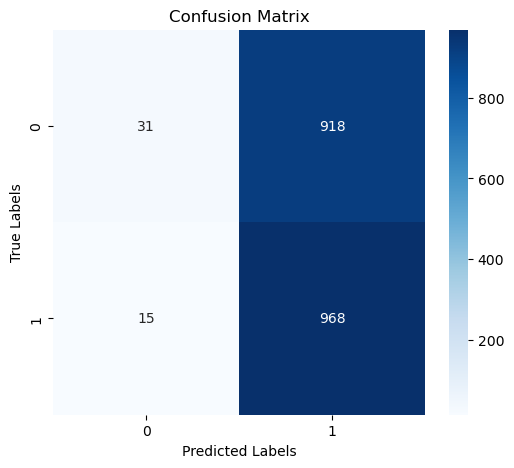

🔹 Confusion Matrix for SVC (Test):


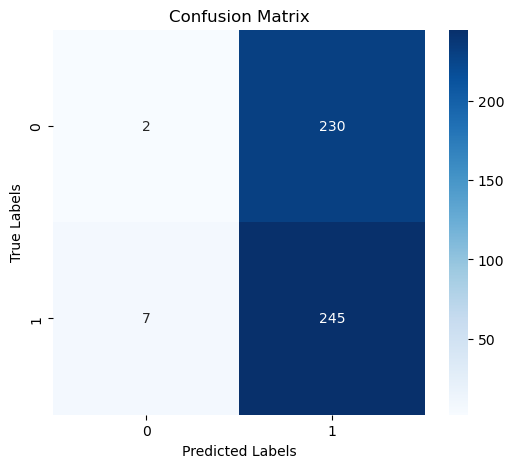


🔹 Confusion Matrix for DecisionTreeClassifier (Train):


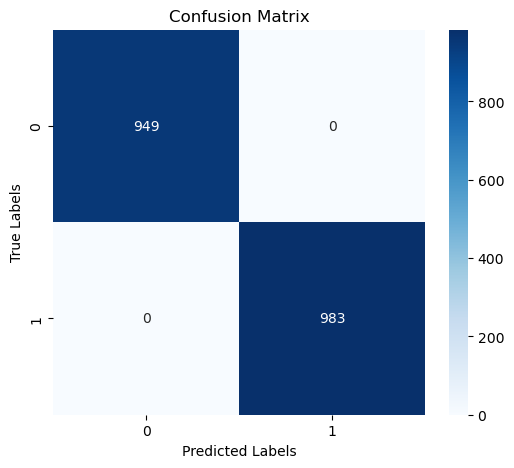

🔹 Confusion Matrix for DecisionTreeClassifier (Test):


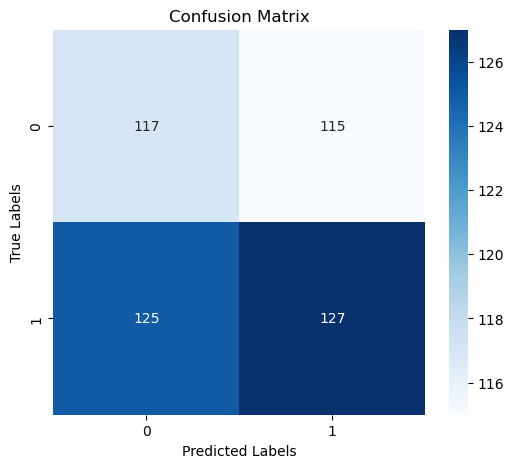


🔹 Confusion Matrix for LogisticRegression (Train):


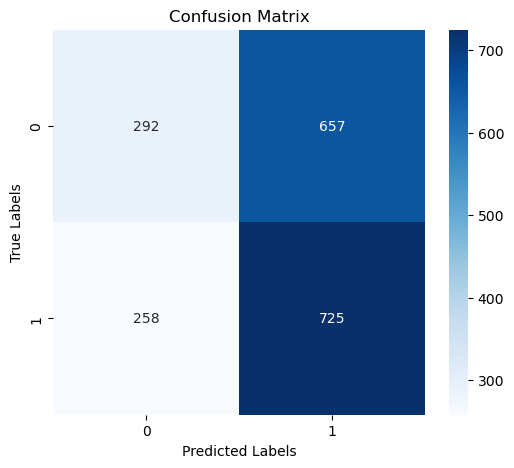

🔹 Confusion Matrix for LogisticRegression (Test):


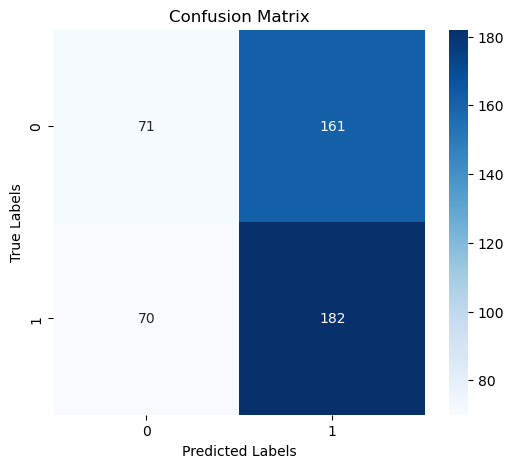


🔹 Confusion Matrix for XGBClassifier (Train):


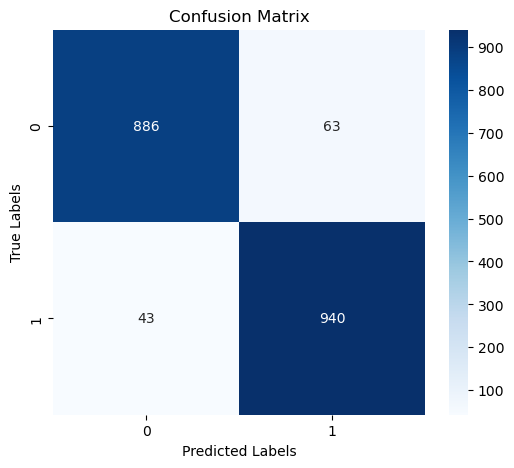

🔹 Confusion Matrix for XGBClassifier (Test):


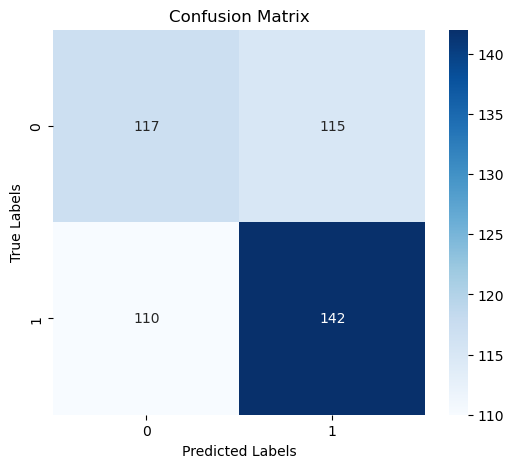


🔹 Confusion Matrix for XGBRFClassifier (Train):


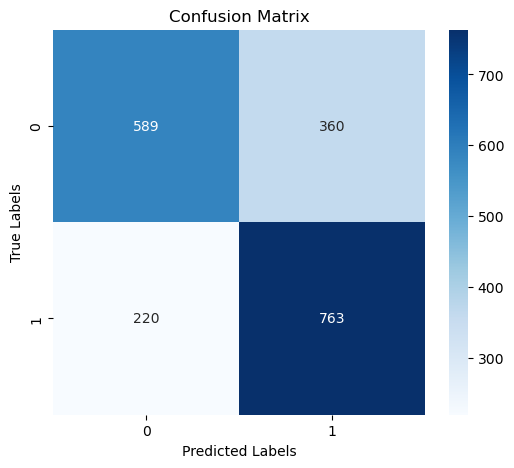

🔹 Confusion Matrix for XGBRFClassifier (Test):


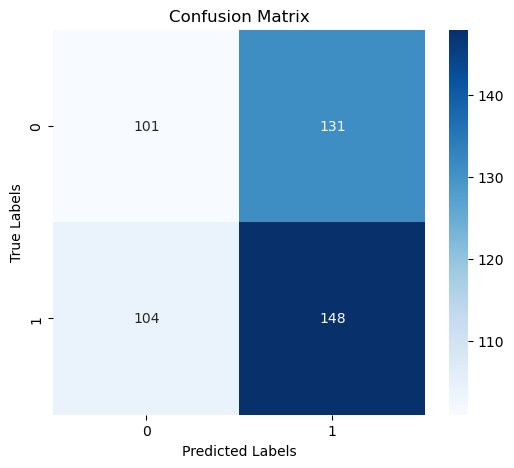


🔹 Confusion Matrix for RandomForestClassifier (Train):


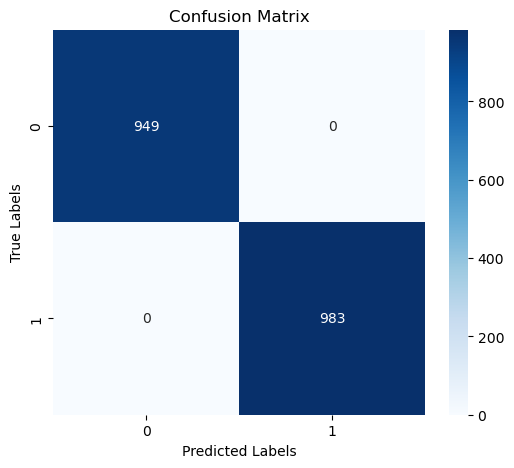

🔹 Confusion Matrix for RandomForestClassifier (Test):


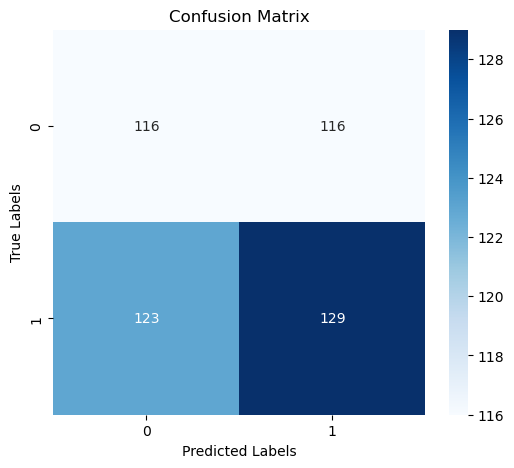

In [64]:
display_results()

Among the six models, we have trained **XGBClassifier** has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.
and finally we plot **Confusion Matrix** 